In [1]:
import pandas as pd
import matplotlib.pyplot as plt
customers = pd.read_csv('customer_churn.csv')
orders = pd.read_csv('sales_data.csv')

In [2]:
customers.head()


,CustomerID,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,Churn
0,C00001,6,64,1540,One year,Credit Card,No,1,0
1,C00002,21,113,1753,Month-to-month,Electronic Check,Yes,1,0
2,C00003,27,31,1455,Two year,Credit Card,No,1,0
3,C00004,53,29,7150,Month-to-month,Electronic Check,No,1,0
4,C00005,16,185,1023,One year,Electronic Check,No,1,0


In [3]:
customers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        500 non-null    object
 1   Tenure            500 non-null    int64 
 2   MonthlyCharges    500 non-null    int64 
 3   TotalCharges      500 non-null    int64 
 4   Contract          500 non-null    object
 5   PaymentMethod     500 non-null    object
 6   PaperlessBilling  500 non-null    object
 7   SeniorCitizen     500 non-null    int64 
 8   Churn             500 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 35.3+ KB


In [4]:
customers.describe()

,Tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Churn
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,36.532000,113.636000,4237.882000,0.498000,0.106000
std,20.667057,51.799903,2260.619837,0.500497,0.308146
min,1.000000,20.000000,159.000000,0.000000,0.000000
25%,19.000000,67.000000,2237.250000,0.000000,0.000000
50%,37.000000,115.000000,4182.500000,0.000000,0.000000
75%,54.000000,158.000000,6266.750000,1.000000,0.000000
max,71.000000,199.000000,7992.000000,1.000000,1.000000


In [5]:
orders.head()

,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales
0,2024-01-01,Phone,7,37300,CUST001,East,261100
1,2024-01-02,Headphones,4,15406,CUST002,North,61624
2,2024-01-03,Phone,2,21746,CUST003,West,43492
3,2024-01-04,Headphones,1,30895,CUST004,East,30895
4,2024-01-05,Laptop,8,39835,CUST005,North,318680


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         100 non-null    object
 1   Product      100 non-null    object
 2   Quantity     100 non-null    int64 
 3   Price        100 non-null    int64 
 4   Customer_ID  100 non-null    object
 5   Region       100 non-null    object
 6   Total_Sales  100 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 5.6+ KB


Check for missing values

In [7]:
customers.isna().sum()  

CustomerID          0
Tenure              0
MonthlyCharges      0
TotalCharges        0
Contract            0
PaymentMethod       0
PaperlessBilling    0
SeniorCitizen       0
Churn               0
dtype: int64

In [8]:
orders.isna().sum()

Date           0
Product        0
Quantity       0
Price          0
Customer_ID    0
Region         0
Total_Sales    0
dtype: int64

Handelling missing values

In [9]:
orders["Price"].fillna(orders["Price"].mean(), inplace=True)
customers.dropna(subset=["Churn"], inplace=True)

/var/folders/1p/cz3nhr5j78978bvwg1k_2k0c0000gn/T/ipykernel_2529/2287377951.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders["Price"].fillna(orders["Price"].mean(), inplace=True)


Converting databases

In [10]:
orders["order_date"] = pd.to_datetime(orders["Date"])
orders["revenue"] = orders["Quantity"] * orders["Price"]
orders["month"] = orders["order_date"].dt.to_period("M")



Merge dataset

In [11]:
print("Orders columns:", orders.columns)
print("Customers columns:", customers.columns)

Orders columns: Index(['Date', 'Product', 'Quantity', 'Price', 'Customer_ID', 'Region',
       'Total_Sales', 'order_date', 'revenue', 'month'],
      dtype='object')
Customers columns: Index(['CustomerID', 'Tenure', 'MonthlyCharges', 'TotalCharges', 'Contract',
       'PaymentMethod', 'PaperlessBilling', 'SeniorCitizen', 'Churn'],
      dtype='object')


In [12]:
# Use r'(\d+)' to indicate a raw string for the regular expression
orders['Customer_ID_clean'] = orders['Customer_ID'].str.extract(r'(\d+)')
customers['CustomerID_clean'] = customers['CustomerID'].str.extract(r'(\d+)')

# Now perform the merge
data = orders.merge(
    customers, 
    left_on="Customer_ID_clean", 
    right_on="CustomerID_clean", 
    how="left"
)

Top Customers

In [13]:
top_customers = (data.groupby("Customer_ID")["revenue"].sum().sort_values(ascending=False).head(10))

customer lifetime values

In [14]:
clv = data.groupby("Churn")["revenue"].sum()


Regional distribution

In [15]:
region_sales = data.groupby("Region")["revenue"].sum().sort_values(ascending=False)

Sales patterns Analysis

In [16]:
monthly_sales = data.groupby("month")["revenue"].sum().sort_values(ascending=False)
print(monthly_sales)

month
2024-03    4485006
2024-01    4120524
2024-02    2656050
2024-04    1103468
Freq: M, Name: revenue, dtype: int64


Finding out the best selling product

In [17]:
best_product = data.groupby("Product")["Total_Sales"].sum().sort_values(ascending=False)
print(best_product)

Product
Laptop        3889210
Tablet        2884340
Phone         2859394
Headphones    1384033
Monitor       1348071
Name: Total_Sales, dtype: int64


Checking the trend of monthly sales

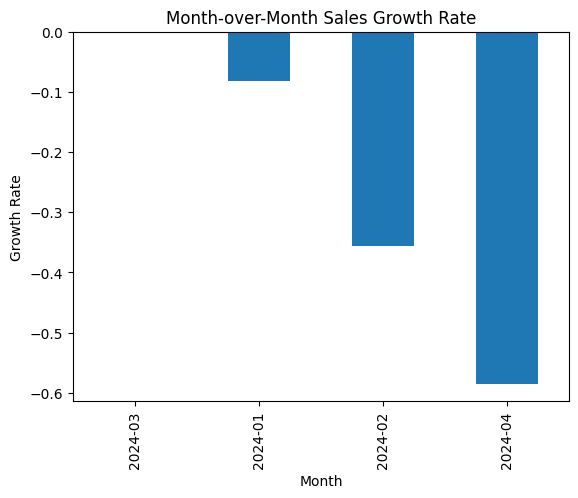

In [18]:
ax = monthly_sales.pct_change().plot(kind='bar', title='Month-over-Month Sales Growth Rate') 
ax.set_ylabel('Growth Rate')
ax.set_xlabel('Month')

plt.show()

Pivot table

In [19]:
pivot_table = data.pivot_table(values= 'revenue', index='Region', columns='Churn', aggfunc='sum', fill_value=0)


Retention Rate

In [20]:
# Convert to datetime first, then to period
data["Date"] = pd.to_datetime(data["Date"]).dt.to_period("M")

Cross selling analysis

In [21]:
cross_sell = (data.groupby(["month", "Product"])["Customer_ID"].nunique().unstack().fillna(0))

Monthly revenue trend

<Axes: title={'center': 'Monthly Sales'}, xlabel='month'>

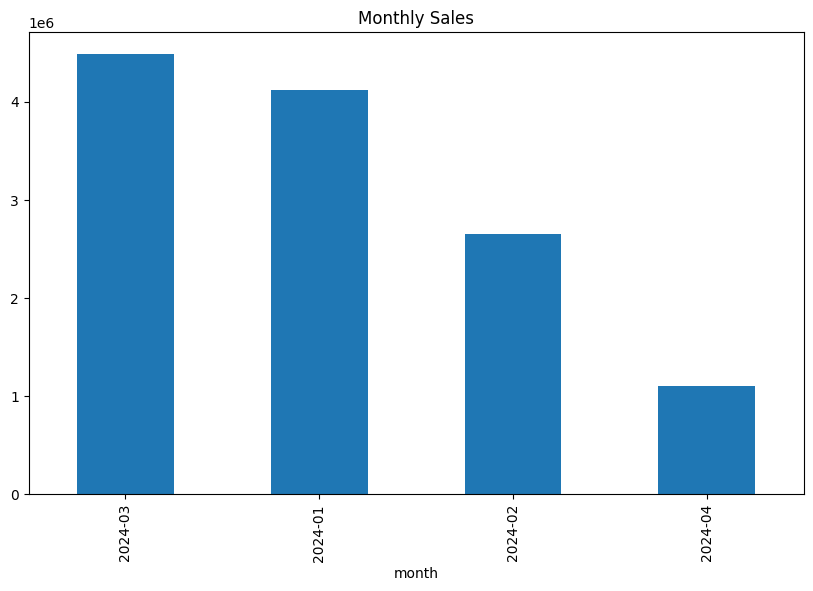

In [22]:
import matplotlib as plt

monthly_sales.plot(kind = 'bar',figsize = (10,6), title = 'Monthly Sales')

Revenue by region


<Axes: title={'center': 'Sales by Region'}, xlabel='Region'>

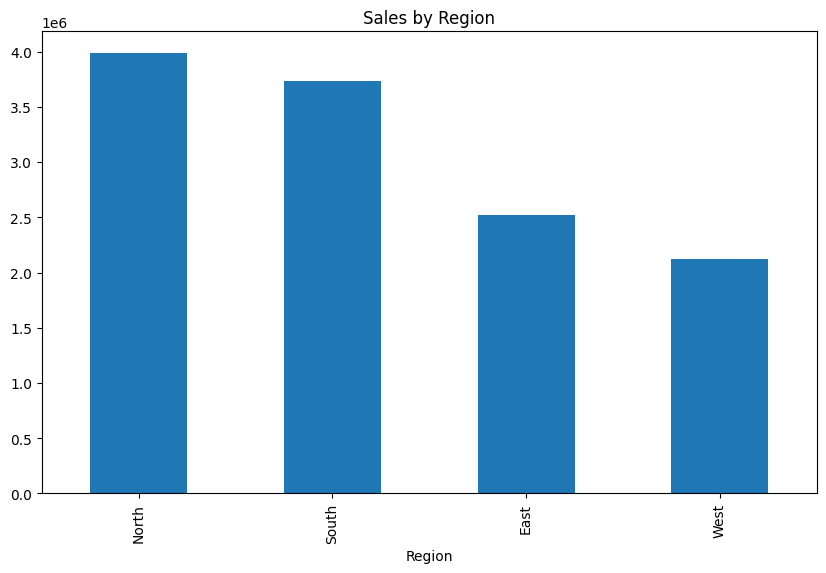

In [23]:
region_sales.plot(kind = 'bar',figsize = (10,6), title = 'Sales by Region')

Product ctegory

<Axes: title={'center': 'Sales by Product'}, xlabel='Product'>

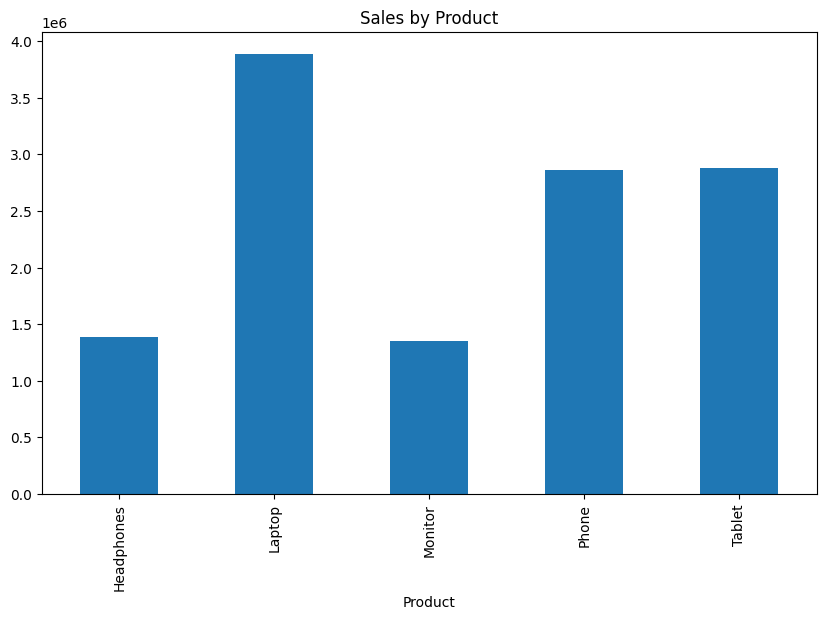

In [24]:
data.groupby("Product")["revenue"].sum().plot(kind='bar', figsize=(10,6), title='Sales by Product')


Best product


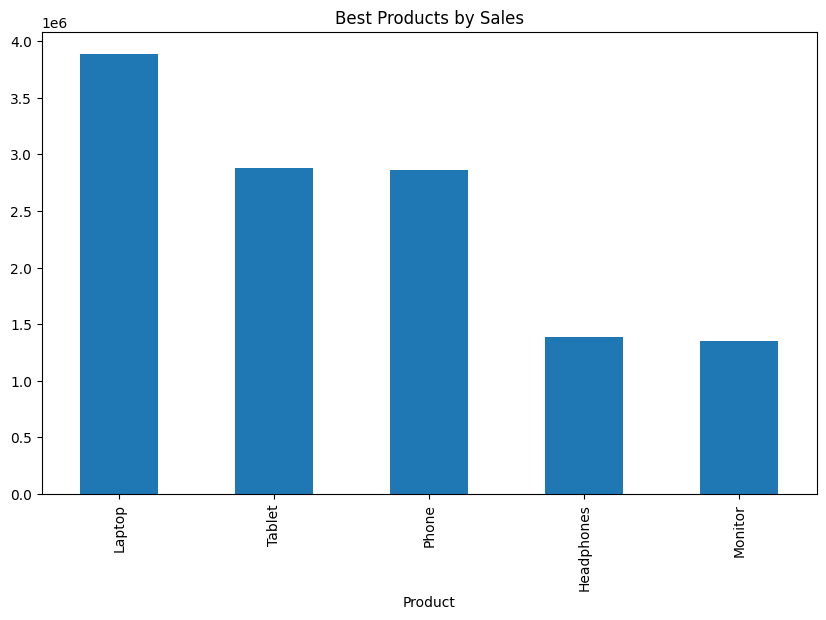

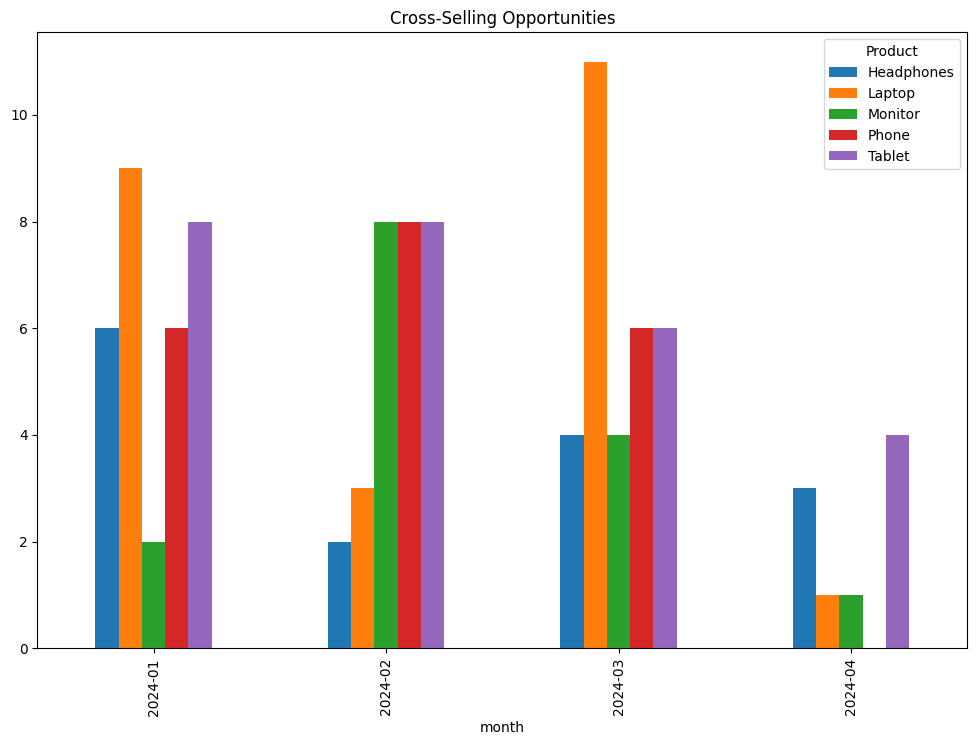

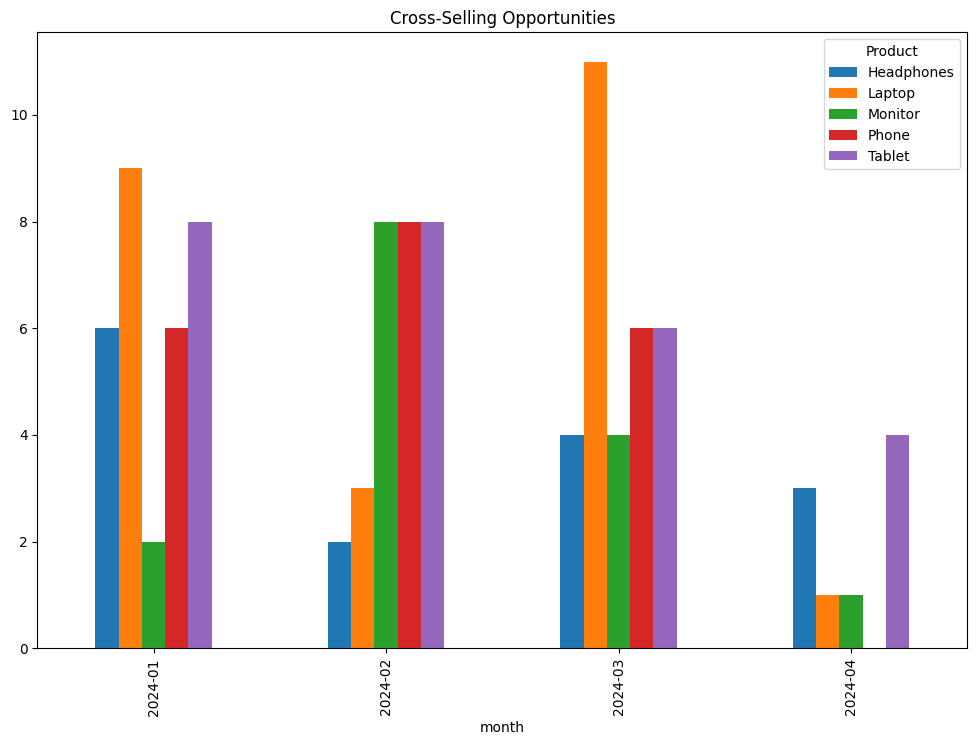

In [25]:
best_product = data.groupby("Product")["Total_Sales"].sum().sort_values(ascending=False)
best_product.plot(kind='bar', figsize=(10,6), title='Best Products by Sales')
cross_sell.plot(kind='bar', figsize=(12,8), title='Cross-Selling Opportunities')
cross_sell.plot(kind='bar', figsize=(12,8), title='Cross-Selling Opportunities')
cross_sell = (data.groupby(["month", "Product"])["Customer_ID"].nunique().unstack().fillna(0))


In [ ]:
print("Customer Sales Analysis Report")
print(f'Total revenue: ${data["revenue"].sum():,.2f}')
print(f'Top Customers:\n{top_customers} ')
print(f'Average Order Value: ${data["revenue"].mean():,.2f}')
print(f'Customer Lifetime Value by Churn Status:\n{clv} ')

Customer Sales Analysis Report
total revenue: $12,365,048.00
Top Customers:
Customer_ID
CUST016    373932
CUST007    363870
CUST083    350888
CUST073    349510
CUST020    333992
CUST084    324144
CUST070    318762
CUST005    318680
CUST065    312564
CUST028    304465
Name: revenue, dtype: int64 
Average Order Value: $123,650.48
Customer Lifetime Value by Churn Status:
Series([], Name: revenue, dtype: int64) 
